<a href="https://colab.research.google.com/github/Es-YES-Ye/Python/blob/main/d08_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%run my_init.py

Mounted at /content/drive


In [ ]:
%matplotlib inline

In [ ]:
wine = pd.read_csv("https://bit.ly/wine_csv_data")
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [ ]:
np.unique(wine['class'])

array([0., 1.])

In [ ]:
wine.iloc[:, :-1].describe()

,alcohol,sugar,pH
count,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501
std,1.192712,4.757804,0.160787
min,8.000000,0.600000,2.720000
25%,9.500000,1.800000,3.110000
50%,10.300000,3.000000,3.210000
75%,11.300000,8.100000,3.320000
max,14.900000,65.800000,4.010000


In [ ]:
wine.iloc[1:4, :3]

,alcohol,sugar,pH
1,9.8,2.6,3.20
2,9.8,2.3,3.26
3,9.8,1.9,3.16


In [ ]:
wine.iloc[1:4, :-1]

,alcohol,sugar,pH
1,9.8,2.6,3.20
2,9.8,2.3,3.26
3,9.8,1.9,3.16


In [ ]:
wine.loc[1:3, 'alcohol':'pH']

,alcohol,sugar,pH
1,9.8,2.6,3.20
2,9.8,2.3,3.26
3,9.8,1.9,3.16


In [ ]:
pd.Categorical(wine['class'].astype('int')).describe()

,counts,freqs
categories,,
0,1599,0.246114
1,4898,0.753886


In [ ]:
wine['class'].astype('category').describe()

count     6497.0
unique       2.0
top          1.0
freq      4898.0
Name: class, dtype: float64

In [ ]:
wine.loc[:, 'alcohol':'pH'].describe()

,alcohol,sugar,pH
count,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501
std,1.192712,4.757804,0.160787
min,8.000000,0.600000,2.720000
25%,9.500000,1.800000,3.110000
50%,10.300000,3.000000,3.210000
75%,11.300000,8.100000,3.320000
max,14.900000,65.800000,4.010000


In [ ]:
wine.iloc[:, :-1].to_numpy()

array([[ 9.4 ,  1.9 ,  3.51],
       [ 9.8 ,  2.6 ,  3.2 ],
       [ 9.8 ,  2.3 ,  3.26],
       ...,
       [ 9.4 ,  1.2 ,  2.99],
       [12.8 ,  1.1 ,  3.34],
       [11.8 ,  0.8 ,  3.26]])

In [ ]:
wine['class'].to_numpy()

array([0., 0., 0., ..., 1., 1., 1.])

In [ ]:
data = wine.iloc[:, :-1].to_numpy()
target = wine['class'].to_numpy()
train_input, test_input, train_target, test_target \
  = train_test_split(data, target, test_size=0.2, random_state=42)

In [ ]:
train_input.shape, train_target.shape

((5197, 3), (5197,))

In [ ]:
test_input.shape, test_target.shape

((1300, 3), (1300,))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_input, train_target)

DecisionTreeClassifier(random_state=42)

In [ ]:
print(accuracy_score(train_target, dt.predict(train_input)))
print(accuracy_score(test_target, dt.predict(test_input)))

0.996921300750433
0.8584615384615385


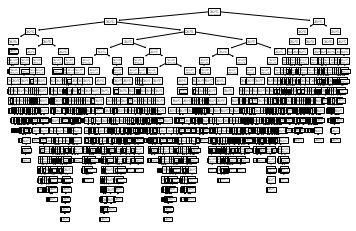

In [ ]:
from sklearn.tree import plot_tree

plot_tree(dt)
plt.show()

In [ ]:
wine.iloc[:, :-1].columns.to_numpy()

array(['alcohol', 'sugar', 'pH'], dtype=object)

In [ ]:
fnames = wine.iloc[:, :-1].columns.to_list()
fnames

['alcohol', 'sugar', 'pH']

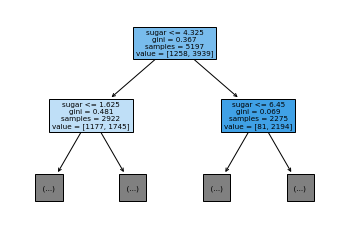

In [ ]:
plot_tree(dt, max_depth=1, filled=True, feature_names = fnames)
plt.show()